In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definindo o tamanho do tabuleiro quadriculado (número de quadrados internos)
# e o tamanho do quadrado em milímetros
board_w = 6
board_h = 9
square_size = 30  # milímetros

In [3]:
# Criando uma matriz de coordenadas do objeto
objp = np.zeros((board_w * board_h, 3), np.float32)
objp[:,:2] = np.mgrid[0:board_w,0:board_h].T.reshape(-1,2)
objp *= square_size

In [4]:
# Criando uma imagem em branco para o padrão de calibração
img_size = (board_h * square_size, board_w * square_size)
img = np.zeros(img_size[::-1], dtype=np.uint8)

# Desenhando um tabuleiro quadriculado na imagem
img[::2*square_size, 1::2*square_size] = 255
img[1::2*square_size, ::2*square_size] = 255

In [5]:
cv2.imwrite('calibration_pattern.png', img)

True

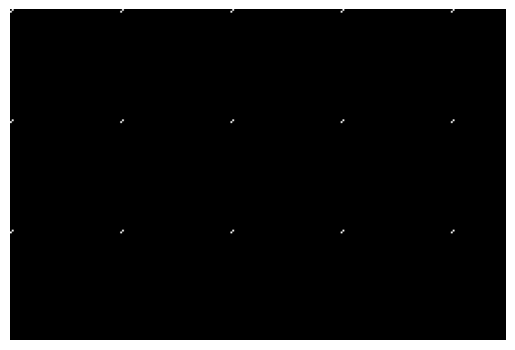

In [6]:
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()